<a href="https://colab.research.google.com/github/fazmila/Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [335]:
#Reading the dataset1
app_record= pd.read_csv('/content/drive/MyDrive/application_record.csv')
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [336]:
cred_record  = pd.read_csv('/content/drive/MyDrive/credit_record.csv')
cred_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [337]:
#To display the first five rows of the Application Data.
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [338]:
#To display the first five rows of the Credit Data.
cred_record .head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [339]:
#To show the number of rows and columns in dataset
app_record.shape

(438557, 18)

In [340]:
cred_record .shape

(1048575, 3)

In [341]:
# Find and display the unique values in the 'STATUS' column
unique_status_values = cred_record ['STATUS'].unique()
print("Unique values in the 'STATUS' column:", unique_status_values)

Unique values in the 'STATUS' column: ['X' '0' 'C' '1' '2' '3' '4' '5']


In [342]:
# Group data by ID and calculate the account age
account_age = cred_record .groupby('ID')['MONTHS_BALANCE'].agg(['min', 'max'])
# Calculate the age in months for each ID
account_age['ACCOUNT_AGE_MONTHS'] = account_age['max'] - account_age['min']
# Reset the index for better readability
account_age = account_age.reset_index()
account_age.head()

,ID,min,max,ACCOUNT_AGE_MONTHS
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


In [343]:
# Drop the 'min' and 'max' columns, keeping only 'ACCOUNT_AGE_MONTHS'
account_age = account_age[['ID', 'ACCOUNT_AGE_MONTHS']]

# Display the updated DataFrame
account_age.head()


,ID,ACCOUNT_AGE_MONTHS
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [344]:
# Join account_age with app_record on 'ID'
app_record = app_record.merge(account_age, on='ID', how='left')
# Display the first few rows of the merged dataset
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0


In [345]:
# Initialize 'Applicant_Category' column to None
cred_record ['Applicant_Category'] = None

# Define a function to classify applicants based on the 'STATUS' value
def classify_applicant(status):
    if status in ['2', '3', '4', '5']:
        return 'bad'
    else:
        return 'good'

# Apply the function to the 'STATUS' column to classify applicants
cred_record ['Applicant_Category'] = cred_record ['STATUS'].apply(classify_applicant)

In [346]:
# Display the unique values in the 'Applicant_Category' column
cred_record ['Applicant_Category'].unique()

array(['good', 'bad'], dtype=object)

In [347]:
# Create a new DataFrame to summarize applicant status
# Count occurrences of 'bad' and 'good' for each 'ID'
applicant_status = cred_record.groupby('ID')['Applicant_Category'].apply(
    lambda x: 'bad' if (x == 'bad').sum() > 0 else 'good'
).reset_index()

In [348]:
applicant_status

,ID,Applicant_Category
0,5001711,good
1,5001712,good
2,5001713,good
3,5001714,good
4,5001715,good
...,...,...
45980,5150482,good
45981,5150483,good
45982,5150484,good
45983,5150485,good


In [349]:
# Join the applicant_status DataFrame with the application_record DataFrame on the 'ID' column
app_record = pd.merge(app_record, applicant_status, how='inner', on='ID')

# Display the first few rows of the merged DataFrame
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9.0,bad


In [350]:
app_record.shape

(36457, 20)

In [351]:
# Function to calculate the age of a customer in years
def calculate_age(days_birth):
    return abs(days_birth) // 365.25  # Convert days to years and take absolute value

In [352]:
def calculate_employment_length(days_employed):
    # If days_employed is non-negative, return 0; otherwise, calculate employment length
    return 0 if days_employed >= 0 else round(abs(days_employed) / 365.25, 2)

In [353]:
#Function to edit family status
def family_status(fam_status):
    if fam_status == 'Single / not married':
        return 'Single'
    elif fam_status == 'Civil marriage':
        return 'Married'
    return fam_status

In [354]:
def house_type(house_type):
    parts = house_type.split(' /')  # Split by ' /'
    if len(parts) > 1:
        return parts[1].strip()  # Return the part after '/'
    return house_type  # Return original if no split

In [355]:
# function to convert from float dtype to int dtype
def count_of_child(cnt_family):
    return int(cnt_family)

In [356]:
# Apply the calculate_age function on the 'DAYS_BIRTH' column to calculate the customer's age
app_record['DAYS_BIRTH'] = app_record['DAYS_BIRTH'].apply(calculate_age)

# Apply the calculate_employment_length function on the 'DAYS_EMPLOYED' column to calculate employment length
app_record['DAYS_EMPLOYED'] = app_record['DAYS_EMPLOYED'].apply(calculate_employment_length)

# Apply the family_status function on the 'NAME_FAMILY_STATUS' column to standardize family status
app_record['NAME_FAMILY_STATUS'] = app_record['NAME_FAMILY_STATUS'].apply(family_status)

# Apply the house_type function on the 'NAME_HOUSING_TYPE' column to process housing type information
app_record['NAME_HOUSING_TYPE'] = app_record['NAME_HOUSING_TYPE'].apply(house_type)

# Apply the function to convert 'CNT_FAM_MEMBERS' to integer
app_record['CNT_FAM_MEMBERS'] = app_record['CNT_FAM_MEMBERS'].apply(count_of_child)

In [357]:
# Rename columns for better readability and understanding
app_record = app_record.rename(columns={'DAYS_BIRTH': 'APPLICANT_AGE', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'})

In [358]:
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,APPLICANT_AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,1,1,0,0,NaN,2,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,1,1,0,0,NaN,2,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,58.0,3.10,1,0,0,0,Security staff,2,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,1,0,1,1,Sales staff,1,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,1,0,1,1,Sales staff,1,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,47.0,6.63,1,0,0,0,Managers,2,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,33.0,3.63,1,0,1,1,Medicine staff,2,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,33.0,3.63,1,0,1,1,Medicine staff,2,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,49.0,1.79,1,0,0,0,Sales staff,2,9.0,bad


In [359]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  APPLICANT_AGE        36457 non-null  float64
 11  YEARS_EMPLOYED       36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [360]:
# Unique Value Count for Each Column
column_unique_count = app_record.nunique().sort_values().reset_index()
column_unique_count.columns = ['Column_Name', 'Number_unique']
print("\nUnique Value Count:")
column_unique_count


Unique Value Count:


,Column_Name,Number_unique
0,FLAG_MOBIL,1
1,Applicant_Category,2
2,CODE_GENDER,2
3,FLAG_OWN_CAR,2
4,FLAG_OWN_REALTY,2
5,FLAG_EMAIL,2
6,FLAG_PHONE,2
7,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,4
9,NAME_INCOME_TYPE,5


In [361]:
# Convert Numerical Binary Columns to Object (Categorical)
binary_columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
app_record[binary_columns] = app_record[binary_columns].astype('object')
# Replace 1 with 'Y' and 0 with 'N'
app_record[binary_columns] = app_record[binary_columns].replace({1: 'Y', 0: 'N'})

In [362]:
# Categorical Columns Overview
app_record.describe(include='O')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,Applicant_Category
count,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,25134,36457
unique,2,2,2,5,5,4,6,1,2,2,2,18,2
top,F,N,Y,Working,Secondary / secondary special,Married,apartment,Y,N,N,N,Laborers,good
freq,24430,22614,24506,18819,24777,27993,32548,36457,28235,25709,33186,6211,35841


In [363]:
# Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
for col in app_record.select_dtypes(include='object').columns:
    print(f"{col}: {app_record[col].unique()}")
    print(app_record[col].value_counts())
    print('-' * 90)


Unique Values in Categorical Columns:
CODE_GENDER: ['M' 'F']
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64
------------------------------------------------------------------------------------------
FLAG_OWN_CAR: ['Y' 'N']
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64
------------------------------------------------------------------------------------------
FLAG_OWN_REALTY: ['Y' 'N']
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64
------------------------------------------------------------------------------------------
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64
------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / 

In [364]:
# Numerical Columns Overview
print("\nNumerical Columns Description:")
app_record.describe().T


Numerical Columns Description:


,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.00,5074614.00,5115396.00,5150487.00
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.00,157500.00,225000.00,1575000.00
APPLICANT_AGE,36457.0,4.323203e+01,11.503981,20.0,34.00,42.00,53.00,68.00
YEARS_EMPLOYED,36457.0,6.024156e+00,6.479909,0.0,1.12,4.25,8.63,43.02
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.0,2.00,2.00,3.00,20.00
ACCOUNT_AGE_MONTHS,36457.0,2.033239e+01,14.911849,0.0,8.00,17.00,30.00,60.00


In [365]:
# Unique Values in Numerical Columns
print("\nUnique Values in Numerical Columns:")
for col in app_record.select_dtypes(include=[np.int64, np.float64]).columns:
    print(f"{col}: {app_record[col].unique()}")
    print(app_record[col].value_counts())
    print('-' * 90)


Unique Values in Numerical Columns:
ID: [5008804 5008805 5008806 ... 5149838 5150049 5150337]
ID
5008804    1
5096993    1
5096983    1
5096987    1
5096988    1
          ..
5050819    1
5050815    1
5050813    1
5050812    1
5150337    1
Name: count, Length: 36457, dtype: int64
------------------------------------------------------------------------------------------
CNT_CHILDREN: [ 0  1  3  2  4  5 14 19  7]
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64
------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL: [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500

In [366]:
# Check Duplicate Rows
duplicate_count = app_record.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


In [367]:
app_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [368]:
#Create income bins to categorize the annual income
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]  # Define income bins
income_labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K+']  # Labels for bins
# Add a new column 'income_group' to categorize the 'AMT_INCOME_TOTAL'
app_record['income_group'] = pd.cut(app_record['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, right=False)

In [369]:
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category,income_group
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,12.44,Y,Y,N,N,NaN,2,15.0,good,300K+
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,12.44,Y,Y,N,N,NaN,2,14.0,good,300K+
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,...,3.10,Y,N,N,N,Security staff,2,29.0,good,100K-150K
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,...,8.35,Y,N,Y,Y,Sales staff,1,4.0,good,250K-300K
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,...,8.35,Y,N,Y,Y,Sales staff,1,4.0,good,250K-300K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,...,6.63,Y,N,N,N,Managers,2,11.0,bad,300K+
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,...,3.63,Y,N,Y,Y,Medicine staff,2,23.0,bad,150K-200K
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,...,3.63,Y,N,Y,Y,Medicine staff,2,32.0,bad,150K-200K
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,...,1.79,Y,N,N,N,Sales staff,2,9.0,bad,250K-300K


In [370]:
# For each income group, find the most frequent occupation type
occupation_by_income = app_record.groupby('income_group', observed=False)['OCCUPATION_TYPE'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

In [371]:
# Merge the occupation_by_income DataFrame back with the original DataFrame
app_record = app_record.merge(occupation_by_income, on='income_group', how='left', suffixes=('', '_filled'))

In [372]:
# Fill missing 'OCCUPATION_TYPE' values with the most common occupation in the corresponding income group
app_record['OCCUPATION_TYPE'] = app_record['OCCUPATION_TYPE'].fillna(app_record['OCCUPATION_TYPE_filled'])

In [373]:
# Drop the 'OCCUPATION_TYPE_filled' and 'income group' column if it's no longer needed
app_record.drop(columns=['OCCUPATION_TYPE_filled','income_group'], inplace=True)

In [374]:
# Check if there are still any missing values in 'OCCUPATION_TYPE'
print(f"Remaining missing values in 'OCCUPATION_TYPE': {app_record['OCCUPATION_TYPE'].isnull().sum()}")

Remaining missing values in 'OCCUPATION_TYPE': 0


In [375]:
# Rename columns in app_record for better readability
app_record.rename(columns={
    'CODE_GENDER' : 'GENDER' ,
    'DAYS_BIRTH': 'APPLICANT_AGE',
    'DAYS_EMPLOYED': 'YEARS_EMPLOYED',
    'CNT_FAM_MEMBERS': 'NUM_FAMILY_MEMBERS',
    'AMT_INCOME_TOTAL': 'TOTAL_INCOME',
    'NAME_FAMILY_STATUS': 'FAMILY_STATUS',
    'NAME_HOUSING_TYPE': 'HOUSING_TYPE',
    'OCCUPATION_TYPE': 'OCCUPATION',
    'STATUS': 'CREDIT_STATUS',
}, inplace=True)

# Display the updated column names
app_record.columns

Index(['ID', 'GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'TOTAL_INCOME', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'APPLICANT_AGE', 'YEARS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION', 'NUM_FAMILY_MEMBERS', 'ACCOUNT_AGE_MONTHS',
       'Applicant_Category'],
      dtype='object')

In [376]:
app_record

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,TOTAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,APPLICANT_AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION,NUM_FAMILY_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,Y,Y,N,N,Managers,2,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,Y,Y,N,N,Managers,2,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,58.0,3.10,Y,N,N,N,Security staff,2,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,Y,N,Y,Y,Sales staff,1,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,Y,N,Y,Y,Sales staff,1,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,47.0,6.63,Y,N,N,N,Managers,2,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,33.0,3.63,Y,N,Y,Y,Medicine staff,2,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,33.0,3.63,Y,N,Y,Y,Medicine staff,2,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,49.0,1.79,Y,N,N,N,Sales staff,2,9.0,bad


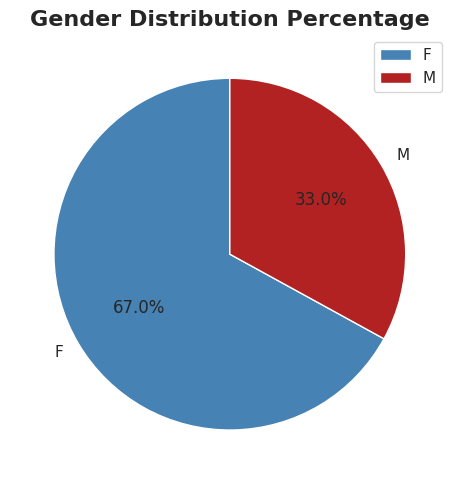

In [377]:
# Calculate the gender distribution in the dataset
gender_counts = app_record['GENDER'].value_counts()

# Plot the pie chart with color names
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'firebrick'], legend=True)

# Add title to the pie chart
plt.title('Gender Distribution Percentage', fontsize=16, fontweight='bold')

# Display the plot
plt.ylabel('')  # Hide the y-axis label
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

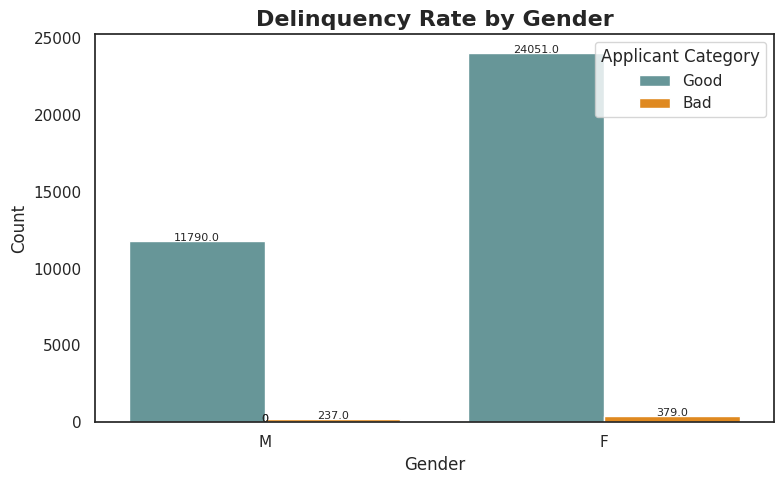

In [378]:
# Count plot to show the delinquency rate by gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=app_record, x='GENDER', hue='Applicant_Category', palette={'good': 'cadetblue', 'bad': 'darkorange'})

# Add count values on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.text(p.get_x() + p.get_width() / 2, height + 200,  # Slightly above the bar
            f'{height}', ha='center', va='center', fontsize=8)  # Add value as text

# Set title and labels
plt.title('Delinquency Rate by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust legend
plt.legend(title='Applicant Category', loc='upper right', labels=['Good', 'Bad'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


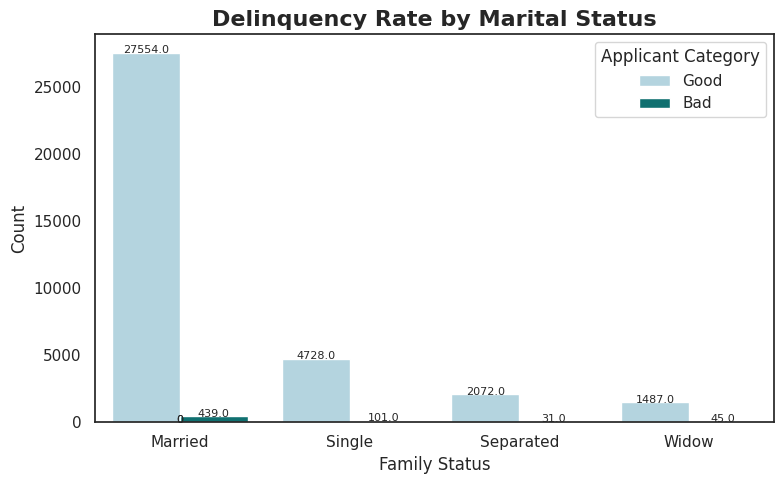

In [379]:
# Count plot to show delinquency rate by marital status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=app_record, x='FAMILY_STATUS', hue='Applicant_Category', palette={'good': 'lightblue', 'bad': 'teal'})

# Add count values on top of each bar with reduced font size and adjusted height
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200,  # Adjusted height
            f'{height}', ha='center', va='center', fontsize=8)  # Reduced font size

# Set title and labels
plt.title('Delinquency Rate by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Family Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust legend
plt.legend(title='Applicant Category', loc='upper right', labels=['Good', 'Bad'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


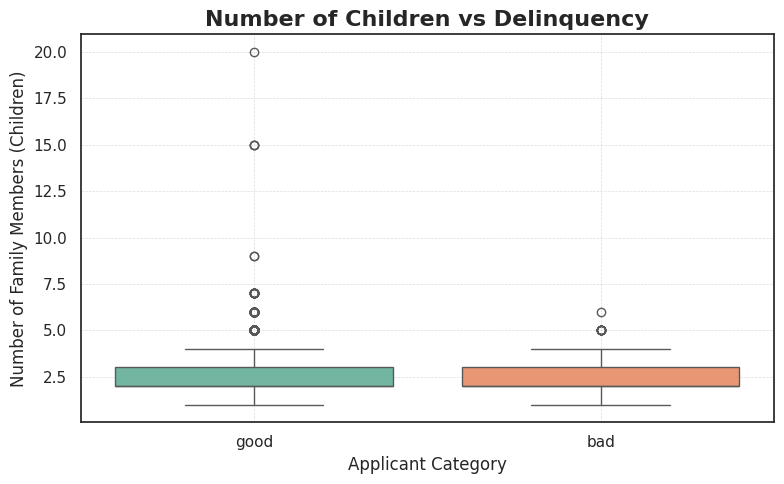

In [380]:
# Box plot to show the relationship between the number of children and delinquency
plt.figure(figsize=(8, 5))
sns.boxplot(data=app_record, x='Applicant_Category', y='NUM_FAMILY_MEMBERS', hue='Applicant_Category', palette='Set2')
plt.title('Number of Children vs Delinquency', fontsize=16 , fontweight='bold')
plt.xlabel('Applicant Category', fontsize=12)
plt.ylabel('Number of Family Members (Children)', fontsize=12)


# Add grid to the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

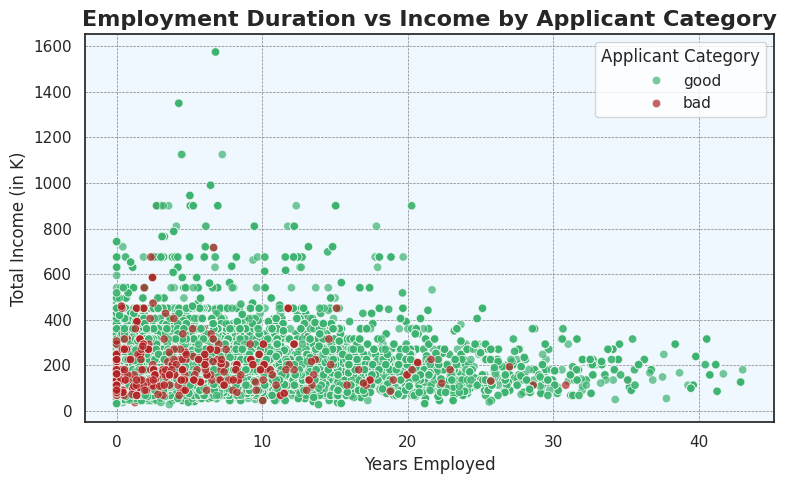

In [381]:
plt.figure(figsize=(8, 5))

# Create a scatter plot with income in K
scatter_plot = sns.scatterplot(
      data=app_record,
      x='YEARS_EMPLOYED',
      y=app_record['TOTAL_INCOME'] / 1000,  # Convert income to K
      hue='Applicant_Category',  # Color by Applicant Category
      palette={'good': 'mediumseagreen', 'bad': 'firebrick'},  # Changed color palette
      alpha=0.7,                  # Transparency for clarity
)

# Set background color for the plot
scatter_plot.set_facecolor('aliceblue')  # Apply background color to the entire figure

# Add title and labels
plt.title('Employment Duration vs Income by Applicant Category', fontsize=16, fontweight='bold')
plt.xlabel('Years Employed', fontsize=12)
plt.ylabel('Total Income (in K)', fontsize=12)  # Updated label

# Automatically generated legend (avoiding manual specification of labels)
plt.legend(title='Applicant Category', loc='upper right')

# Add grid to the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


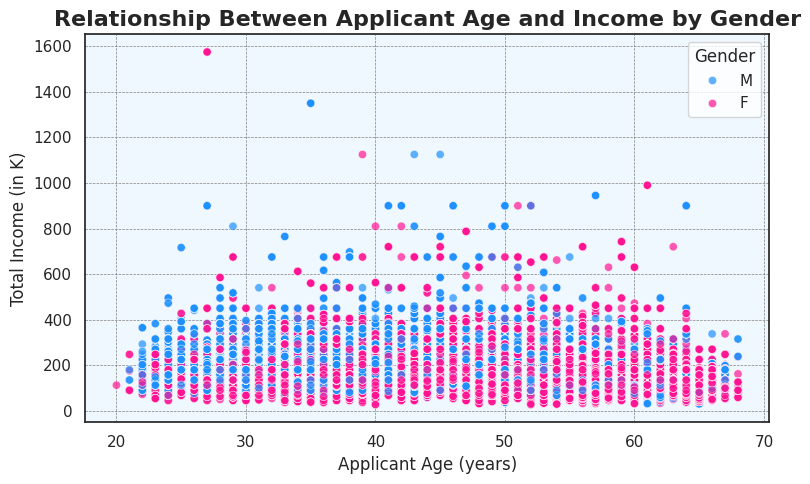

In [382]:
plt.figure(figsize=(8, 5))

# Create a scatter plot with gender differentiation and income in K
scatter_plot = sns.scatterplot(
    data=app_record,
    x='APPLICANT_AGE',
    y=app_record['TOTAL_INCOME'] / 1000,  # Convert income to K
    hue='GENDER',  # Differentiate by gender
    palette={'M': 'dodgerblue', 'F': 'deeppink'},  # Gender-specific colors
    alpha=0.7
)

# Set background color
scatter_plot.set_facecolor('aliceblue')

# Add title and labels
plt.title('Relationship Between Applicant Age and Income by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Applicant Age (years)', fontsize=12)
plt.ylabel('Total Income (in K)', fontsize=12)

# Add grid to the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Display the legend
plt.legend(title='Gender', loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


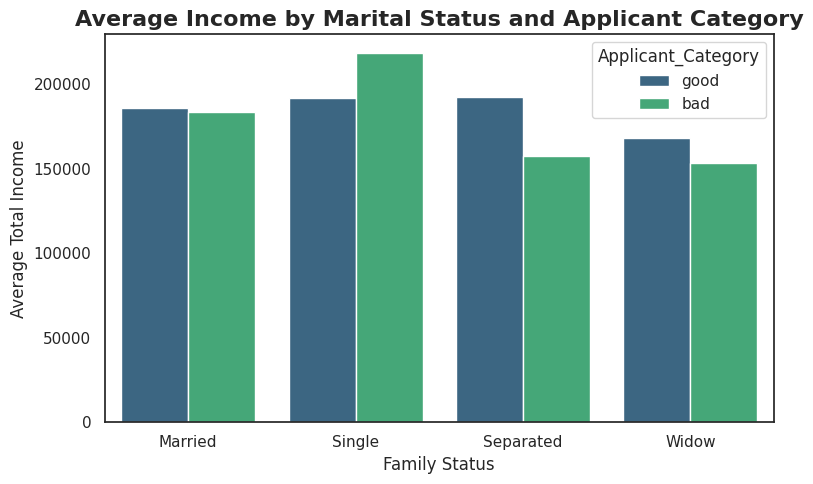

In [383]:
# Bar plot to show the average income by marital status and applicant category
plt.figure(figsize=(8, 5))
sns.barplot(data=app_record, x='FAMILY_STATUS', y='TOTAL_INCOME', hue='Applicant_Category',errorbar=None, palette='viridis')

# Set title and labels
plt.title('Average Income by Marital Status and Applicant Category', fontsize=16, fontweight='bold')
plt.xlabel('Family Status', fontsize=12)
plt.ylabel('Average Total Income', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

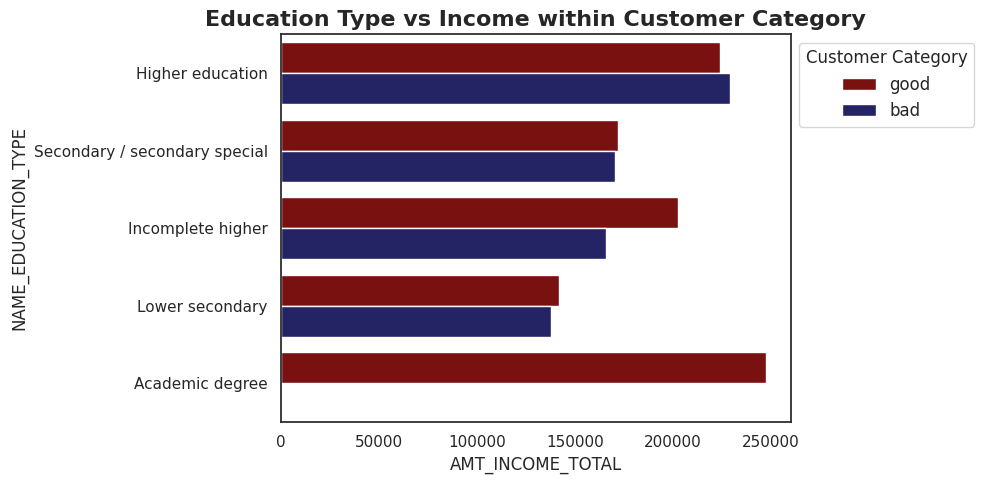

In [384]:
# Create the figure
plt.figure(figsize=(10, 5))

# Create a horizontal bar plot using Seaborn's `barplot`
sns.barplot(data=app_record,
            x='TOTAL_INCOME',
            y='NAME_EDUCATION_TYPE',
            hue='Applicant_Category',
            errorbar=None,  # Avoid confidence interval warning
            orient='h',  # Horizontal bars
            palette=['darkred', 'midnightblue'])  # Color names for the palette

# Add title and labels
plt.title('Education Type vs Income within Customer Category', fontsize=16, fontweight='bold')
plt.xlabel('AMT_INCOME_TOTAL', fontsize=12)
plt.ylabel('NAME_EDUCATION_TYPE', fontsize=12)

# Customize the legend and position it outside the plot
plt.legend(title='Customer Category', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

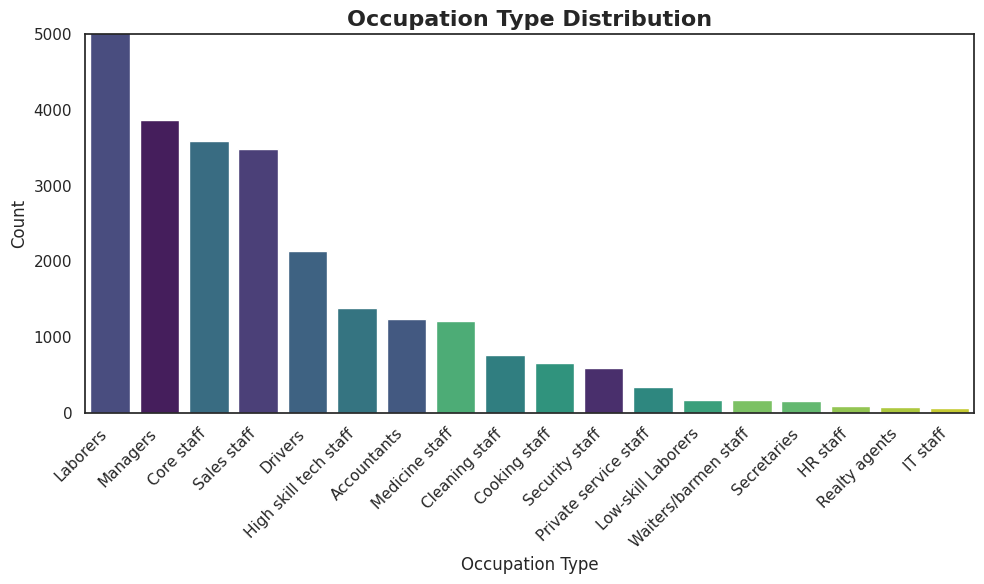

In [385]:
# Bar plot to show the frequency of occupation types
plt.figure(figsize=(10, 6))

# Count plot with a color palette and using 'hue' to avoid the warning
sns.countplot(
    data=app_record,
    x='OCCUPATION',
    hue='OCCUPATION',  # Use 'hue' to resolve the warning, still won't split by categories
    palette='viridis',  # Apply color palette
    order=app_record['OCCUPATION'].value_counts().index,
    legend=False        # Disable the legend as we don't need it
)

# Set the y-axis limit to 5000
plt.ylim(0, 5000)

# Title and labels
plt.title('Occupation Type Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


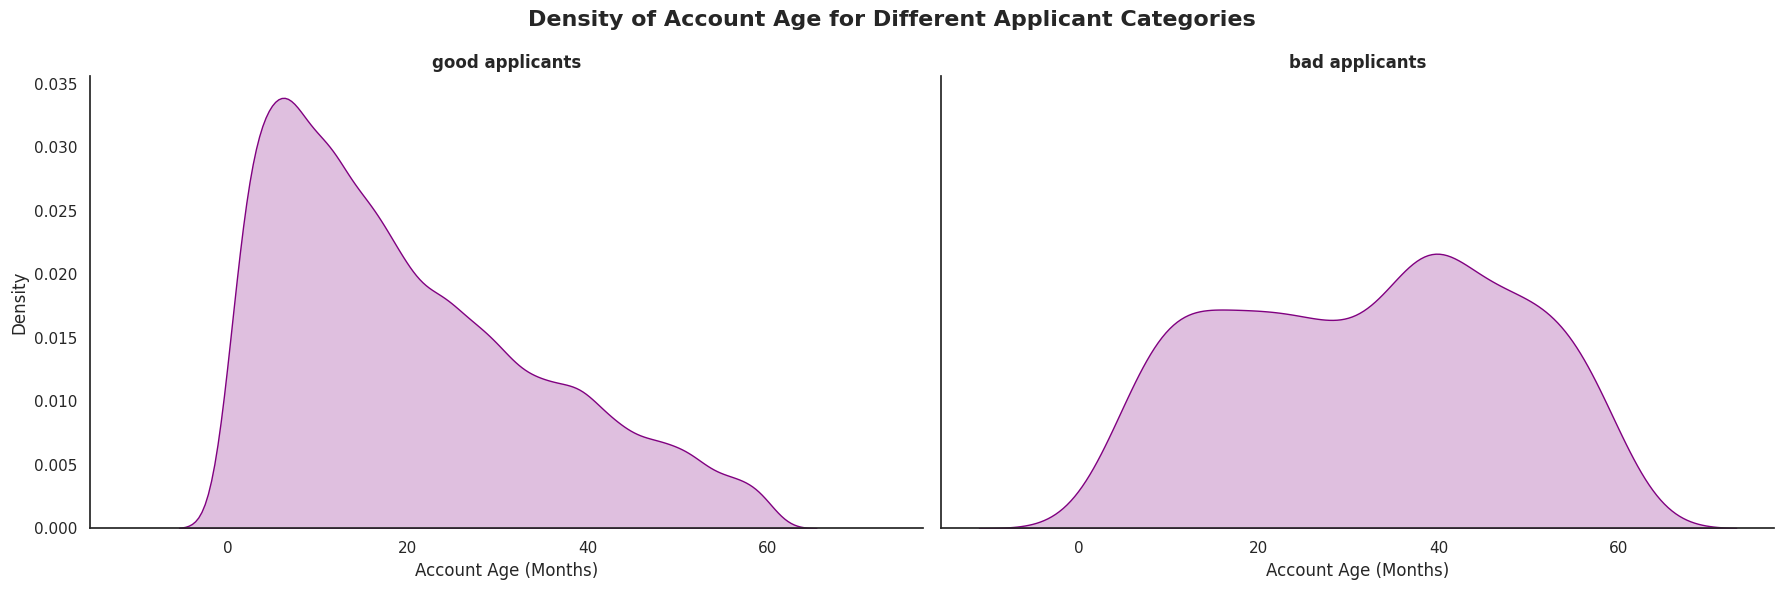

In [386]:
# Create a FacetGrid to plot separate KDEs for both Applicant Categories
g = sns.FacetGrid(app_record, col="Applicant_Category", height=6, aspect=1.5)

# Plot KDE for Account Age on the FacetGrid using the updated 'fill' parameter
g.map(sns.kdeplot, 'ACCOUNT_AGE_MONTHS', fill=True, color='purple')

# Add titles and labels with bold font weight for the graph heading
g.set_axis_labels('Account Age (Months)', 'Density')
g.set_titles('{col_name} applicants', fontsize=14, fontweight='bold')  # Set title in bold

# Add a main title for the entire figure
plt.suptitle('Density of Account Age for Different Applicant Categories', fontsize=16, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

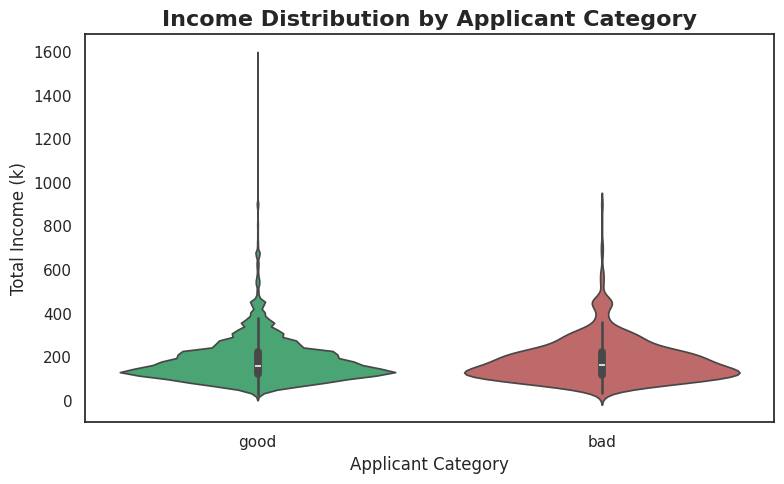

In [387]:
# Create the violin plot with custom color palette and income in thousands
plt.figure(figsize=(8, 5))
sns.violinplot(data=app_record, x='Applicant_Category', y=app_record['TOTAL_INCOME'] / 1000,
               hue='Applicant_Category', palette={'good': 'mediumseagreen', 'bad': 'indianred'})

# Title and labels
plt.title('Income Distribution by Applicant Category', fontsize=16, fontweight='bold')
plt.xlabel('Applicant Category', fontsize=12)
plt.ylabel('Total Income (k)', fontsize=12)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [388]:
app_record.dtypes

,0
ID,int64
GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
TOTAL_INCOME,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
FAMILY_STATUS,object
HOUSING_TYPE,object


In [389]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in app_record.columns:
    if app_record[col].dtype == 'object':  # Check if the column is of type 'object' (categorical)
        app_record[col] = le.fit_transform(app_record[col]).astype('int64')

# Display the first 4 rows of the encoded dataframe
app_record.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,TOTAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,APPLICANT_AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION,NUM_FAMILY_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,1,1,1,0,427500.0,4,1,0,3,32.0,12.44,0,1,0,0,10,2,15.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,3,32.0,12.44,0,1,0,0,10,2,14.0,1
2,5008806,1,1,1,0,112500.0,4,4,0,5,58.0,3.10,0,0,0,0,16,2,29.0,1
3,5008808,0,0,1,0,270000.0,0,4,2,5,52.0,8.35,0,0,1,1,14,1,4.0,1
4,5008809,0,0,1,0,270000.0,0,4,2,5,52.0,8.35,0,0,1,1,14,1,4.0,1


In [390]:
app_record.dtypes

,0
ID,int64
GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,int64
TOTAL_INCOME,float64
NAME_INCOME_TYPE,int64
NAME_EDUCATION_TYPE,int64
FAMILY_STATUS,int64
HOUSING_TYPE,int64


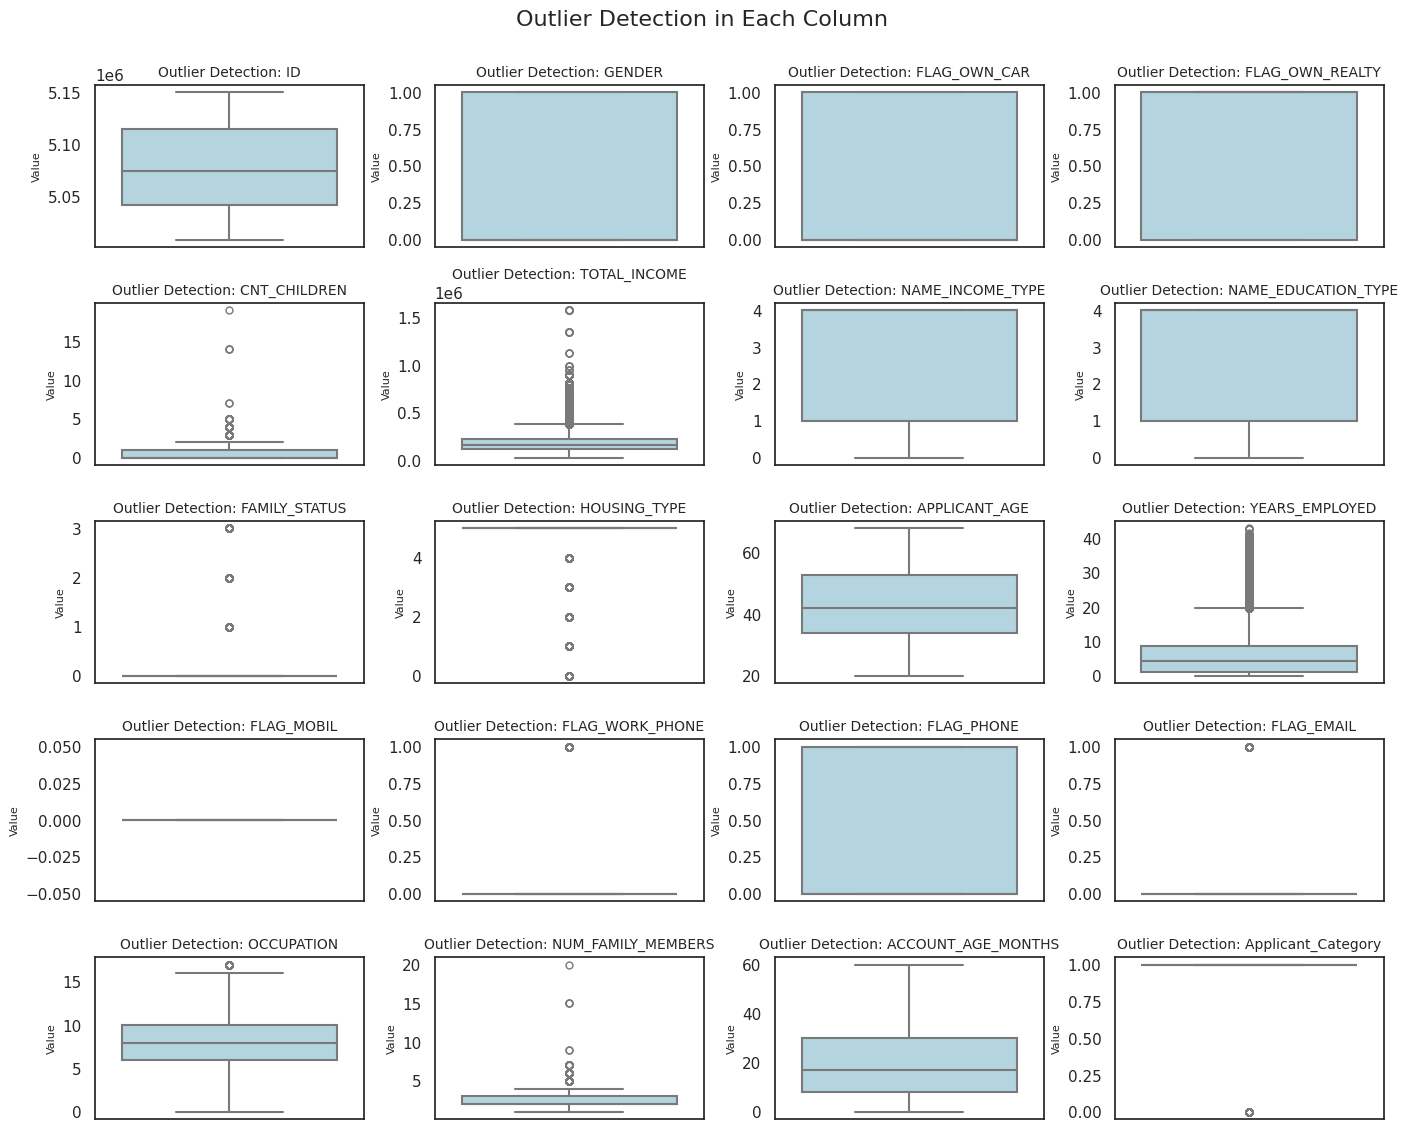

In [391]:
# Create the figure with an adjusted size
fig = plt.figure(figsize=(14, 20))

# Loop through each column to create boxplots
for i, col in enumerate(app_record.columns):
    ax = fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=app_record[col], ax=ax, color="lightblue", fliersize=5, linewidth=1.5)

    # Set the title for each subplot (column name)
    ax.set_title(f'Outlier Detection: {col}', fontsize=10)
    ax.set_ylabel('Value', fontsize=8)
    ax.set_xlabel('')

# Add a main title for the entire plot
plt.suptitle('Outlier Detection in Each Column', fontsize=16, y=1)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [392]:
def count_outliers(df):
    """Count outliers in each numerical column using the IQR method."""
    outlier_counts = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

# Count initial outliers
initial_outlier_counts = count_outliers(app_record)
initial_outlier_counts


{'ID': 0,
 'GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 508,
 'TOTAL_INCOME': 1529,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'FAMILY_STATUS': 8464,
 'HOUSING_TYPE': 3909,
 'APPLICANT_AGE': 0,
 'YEARS_EMPLOYED': 1772,
 'FLAG_MOBIL': 0,
 'FLAG_WORK_PHONE': 8222,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 3271,
 'OCCUPATION': 174,
 'NUM_FAMILY_MEMBERS': 480,
 'ACCOUNT_AGE_MONTHS': 0,
 'Applicant_Category': 616}

In [393]:
def remove_outliers(df):
    """Remove outliers from numerical columns using the IQR method."""
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
app_record_cleaned = remove_outliers(app_record)


In [394]:
def check_outlier_columns(df):
    """Return a list of columns still containing outliers."""
    outlier_columns = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

# Check for columns with remaining outliers
remaining_outlier_columns = check_outlier_columns(app_record_cleaned)
print("Columns with remaining outliers:", remaining_outlier_columns if remaining_outlier_columns else "No outliers detected.")


Columns with remaining outliers: ['FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'YEARS_EMPLOYED', 'OCCUPATION']


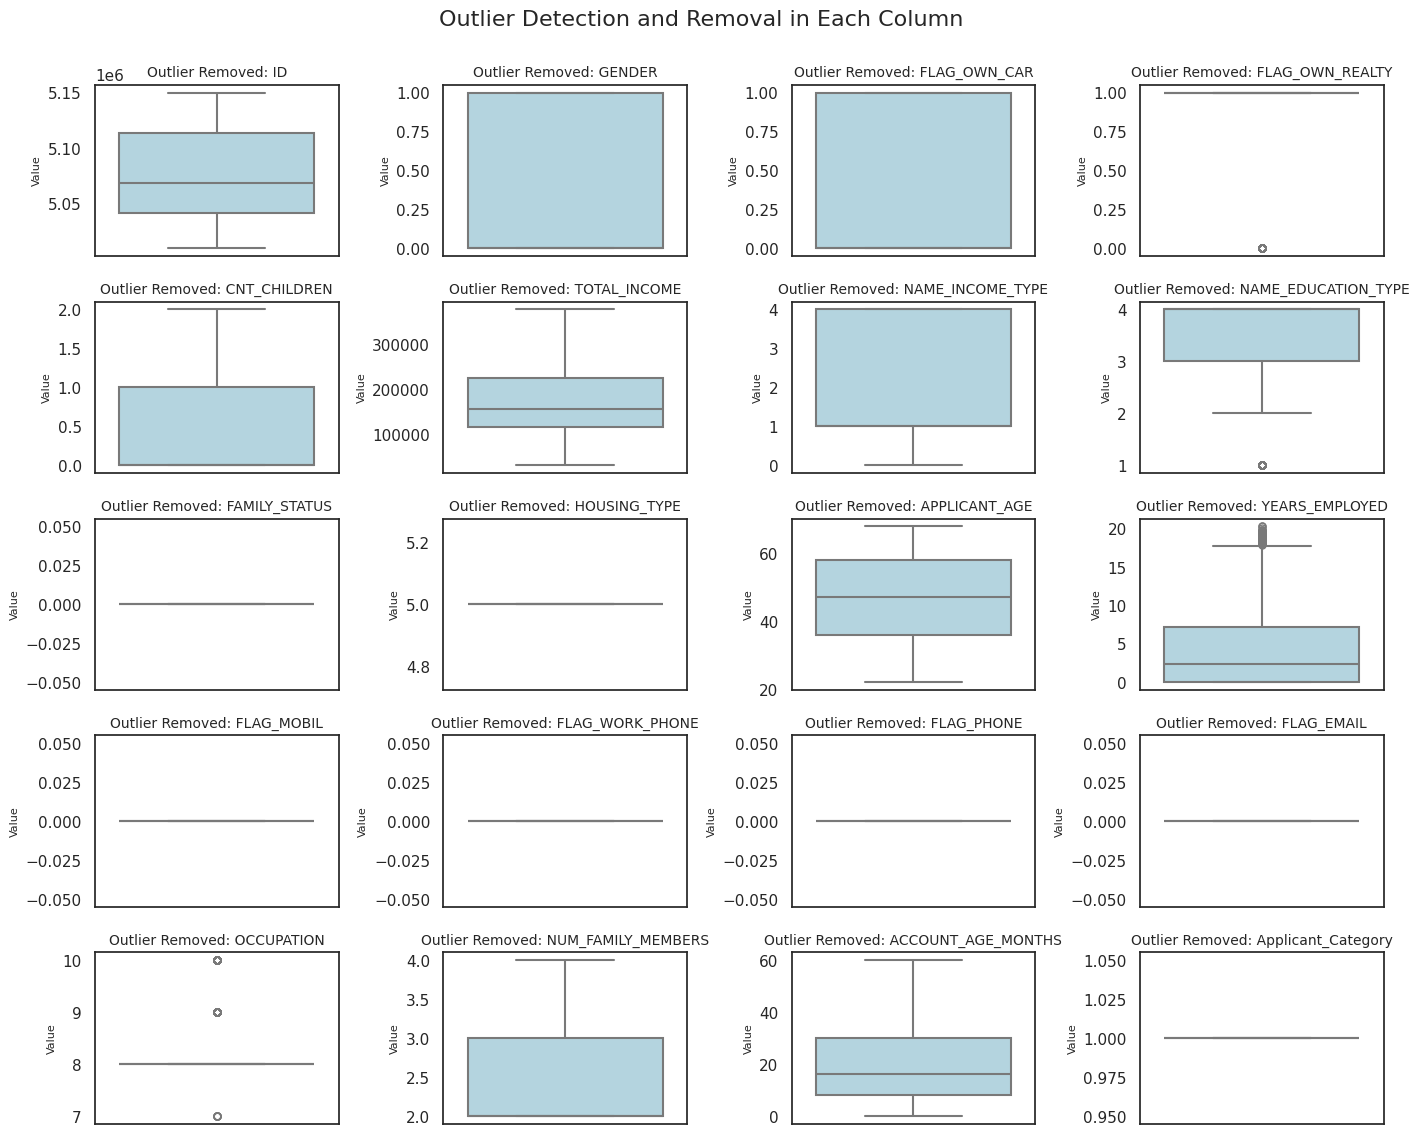

In [395]:
# Create the figure with an adjusted size
fig = plt.figure(figsize=(14, 20))

# Loop through each column to create boxplots
for i, col in enumerate(app_record_cleaned.columns):
    ax = fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=app_record_cleaned[col], ax=ax, color="lightblue", fliersize=5, linewidth=1.5)

    # Set the title for each subplot (column name)
    ax.set_title(f'Outlier Removed: {col}', fontsize=10)
    ax.set_ylabel('Value', fontsize=8)
    ax.set_xlabel('')

# Add a main title for the entire plot
plt.suptitle('Outlier Detection and Removal in Each Column', fontsize=16, y=1)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

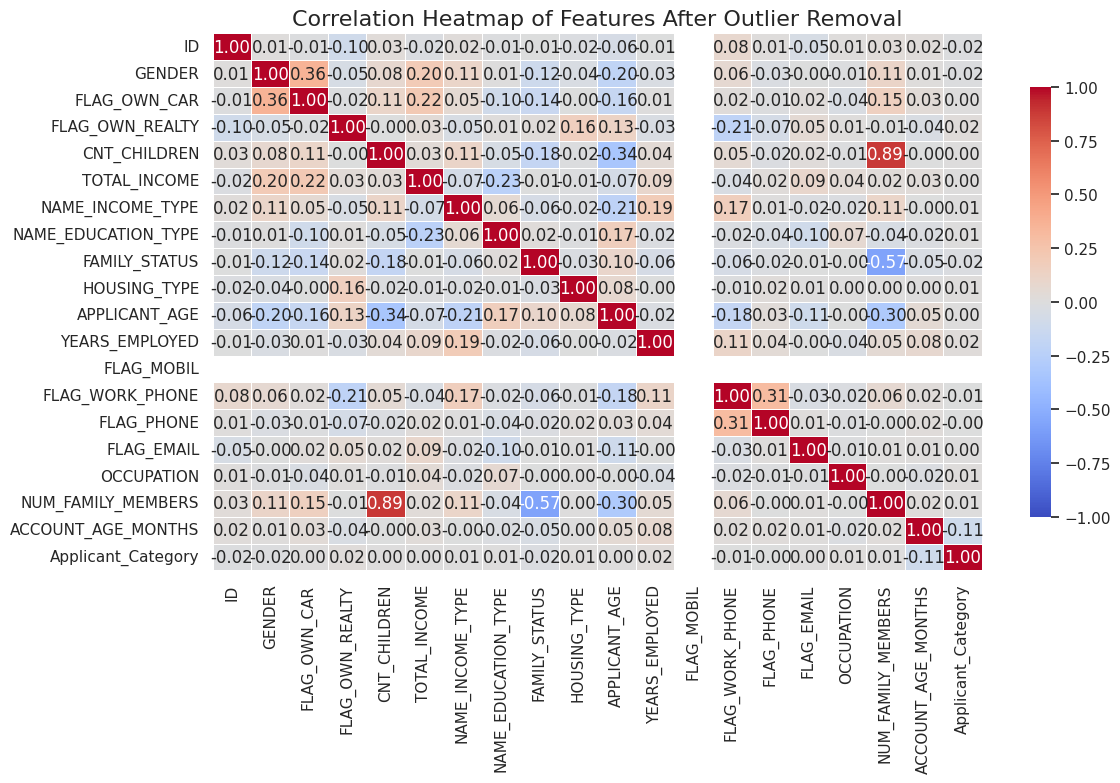

In [396]:
# Calculate the correlation matrix
correlation_matrix = app_record.corr()

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Generate a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

# Set the title of the heatmap
plt.title('Correlation Heatmap of Features After Outlier Removal', fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()

Model Training

In [397]:
# Assuming application_record is already loaded and 'Applicant_Category' is the target variable
X = app_record.drop('Applicant_Category', axis=1)
Y = app_record['Applicant_Category']

In [398]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [399]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the testing data

In [400]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_lr = lr_model.predict(X_test_scaled)

In [401]:
# Initialize and train the Linear SVC model
svm_model = LinearSVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for Linear SVC
y_pred_svm = svm_model.predict(X_test_scaled)

In [402]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set for Decision Tree
y_pred_tree = tree_model.predict(X_test_scaled)

In [403]:
#Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Make predictions on the test set for Random Forest
y_pred_rf = rf_model.predict(X_test)

In [404]:
# Evaluation for all models
models = {
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

In [405]:
# Print evaluation metrics for each model
for model_name, y_pred in models.items():
    print(f"\n{model_name} Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Logistic Regression Model:
Accuracy: 0.6983
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.56      0.06       179
           1       0.99      0.70      0.82     10759

    accuracy                           0.70     10938
   macro avg       0.51      0.63      0.44     10938
weighted avg       0.97      0.70      0.81     10938

Confusion Matrix:
[[ 100   79]
 [3221 7538]]



SVM Model:
Accuracy: 0.7019
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.56      0.06       179
           1       0.99      0.70      0.82     10759

    accuracy                           0.70     10938
   macro avg       0.51      0.63      0.44     10938
weighted avg       0.97      0.70      0.81     10938

Confusion Matrix:
[[ 100   79]
 [3182 7577]]



Decision Tree Model:
Accuracy: 0.9730
Classification Report:
              precision    recall  f1-score   support

           0   

Finding Best Paramaeters

In [406]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],  # Include 'saga' as it's compatible with elasticnet
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],  # 'l2' is compatible with all solvers except 'saga' which needs 'elasticnet'
}

# Initialize RandomizedSearchCV with the correct variable name 'model'
randomized_search_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
randomized_search_lr.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters for Logistic Regression: {randomized_search_lr.best_params_}")

Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 100}


In [407]:
# Define parameter grid
param_grid_linear_svc = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # Use only 'l2' penalty to avoid conflict with dual=True
    'dual': [False],  # Avoid conflict with 'l1' penalty
    'max_iter': [100, 200, 300],  # Increase the max iterations for better convergence
}

# Initialize LinearSVC model
linear_svc_model = LinearSVC()

# Perform grid search with cross-validation (using 3-fold to speed up)
grid_search_linear_svc = GridSearchCV(estimator=linear_svc_model, param_grid=param_grid_linear_svc, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search model
grid_search_linear_svc.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters for Linear SVC: {grid_search_linear_svc.best_params_}")

Best parameters for Linear SVC: {'C': 0.1, 'dual': False, 'max_iter': 100, 'penalty': 'l2'}


In [408]:
# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'class_weight': ['balanced', None],  # Class weight to handle imbalanced data
    'max_features': ['sqrt', 'log2', None],  # Valid options for max_features
}

# Initialize Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best parameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [409]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Hyperparameter Tuning

In [410]:
# Train Logistic Regression with best parameters
model_lr = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=200, C=100, class_weight='balanced', random_state=42)
model_lr.fit(X_train_scaled, y_train)

# Make predictions for Logistic Regression
y_pred_lr = model_lr.predict(X_test_scaled)

In [411]:
# Train Linear SVC with best parameters
model_svc = LinearSVC(C=0.1, dual=False, max_iter=100, penalty='l2', class_weight='balanced', random_state=42)
model_svc.fit(X_train_scaled, y_train)

# Make predictions for Linear SVC
y_pred_svc = model_svc.predict(X_test_scaled)

In [412]:
# Train Decision Tree with best parameters
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, class_weight=None, random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Make predictions for Decision Tree
y_pred_tree = tree_model.predict(X_test_scaled)

In [413]:
# Train Random Forest with best parameters
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

In [414]:
# Evaluation for all models
models = {
    "Logistic Regression": y_pred_lr,
    "Linear SVC": y_pred_svc,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

In [415]:
# Print evaluation metrics for each model
for model_name, y_pred in models.items():
    print(f"\n{model_name} Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Logistic Regression Model:
Accuracy: 0.6984
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.56      0.06       179
           1       0.99      0.70      0.82     10759

    accuracy                           0.70     10938
   macro avg       0.51      0.63      0.44     10938
weighted avg       0.97      0.70      0.81     10938

Confusion Matrix:
[[ 100   79]
 [3220 7539]]



Linear SVC Model:
Accuracy: 0.7019
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.56      0.06       179
           1       0.99      0.70      0.82     10759

    accuracy                           0.70     10938
   macro avg       0.51      0.63      0.44     10938
weighted avg       0.97      0.70      0.81     10938

Confusion Matrix:
[[ 100   79]
 [3182 7577]]



Decision Tree Model:
Accuracy: 0.9835
Classification Report:
              precision    recall  f1-score   support

        

SMOTE

In [416]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [417]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=200, C=100)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


In [418]:
# Linear SVC
svc = LinearSVC(C=0.1, dual=False, max_iter=100, penalty='l2')
svc.fit(X_train_smote, y_train_smote)
y_pred_svc = svc.predict(X_test)

In [419]:
# Decision Tree
dt = DecisionTreeClassifier(
    class_weight=None,
    criterion='entropy',
    max_depth=5,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2
)
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)

In [420]:
# Random Forest
rf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

In [421]:
# Define and train all models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='newton-cg', penalty='l2', max_iter=200, C=100, random_state=42),
    "Linear SVC": LinearSVC(C=0.1, dual=False, max_iter=100, penalty='l2', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100, random_state=42)
}

In [425]:
# Fit models, make predictions, and evaluate in a single loop
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Logistic Regression Model:
Accuracy: 0.7636
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.39      0.05       179
           1       0.99      0.77      0.86     10759

    accuracy                           0.76     10938
   macro avg       0.51      0.58      0.46     10938
weighted avg       0.97      0.76      0.85     10938

Confusion Matrix:
[[  70  109]
 [2477 8282]]


Linear SVC Model:
Accuracy: 0.7255
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.54      0.06       179
           1       0.99      0.73      0.84     10759

    accuracy                           0.73     10938
   macro avg       0.51      0.64      0.45     10938
weighted avg       0.97      0.73      0.83     10938

Confusion Matrix:
[[  97   82]
 [2921 7838]]


Decision Tree Model:
Accuracy: 0.6642
Classification Report:
              precision    recall  f1-score   support

           

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


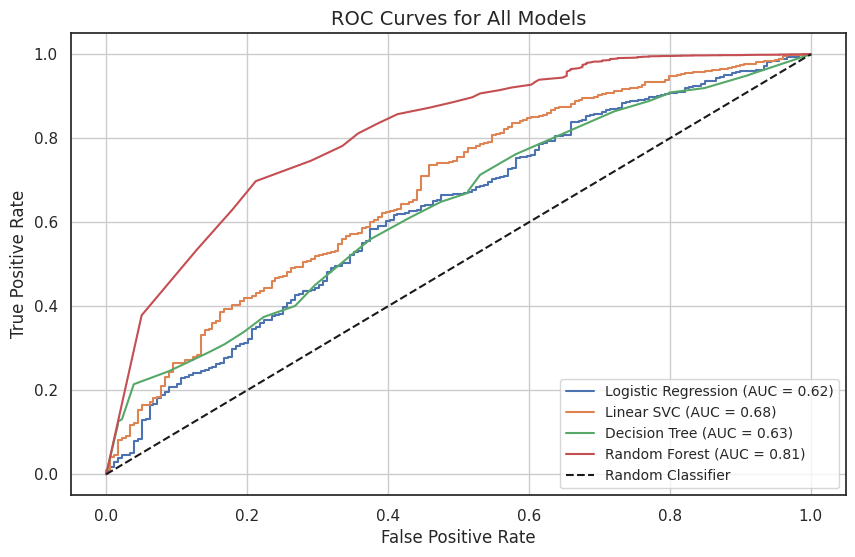

In [426]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test)
    else:
        continue  # Skip models without probability/decision scores

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Customize and display plot
plt.title("ROC Curves for All Models", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()

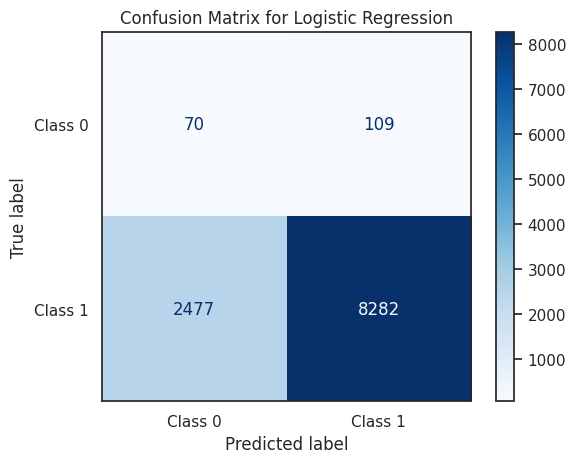

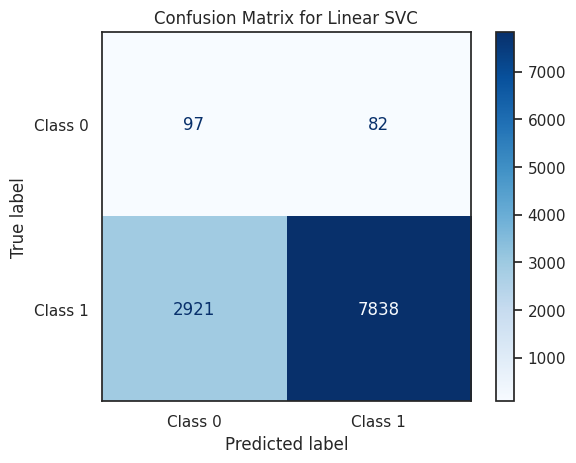

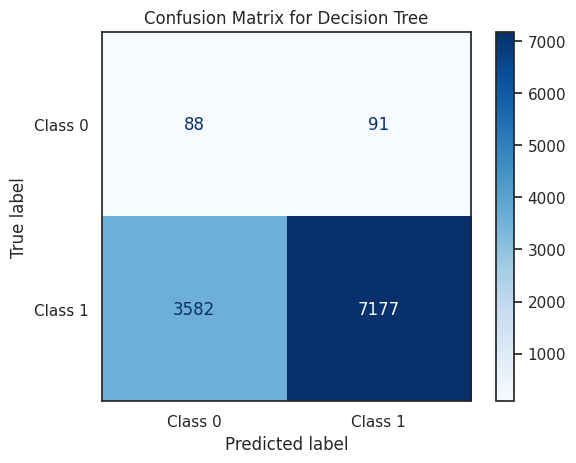

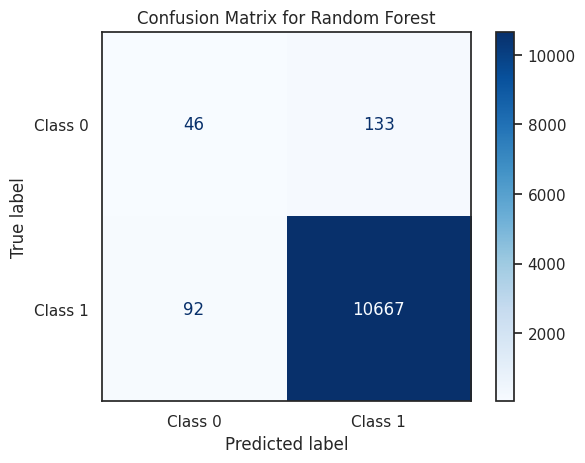

In [427]:
# Plot Confusion Matrix for each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


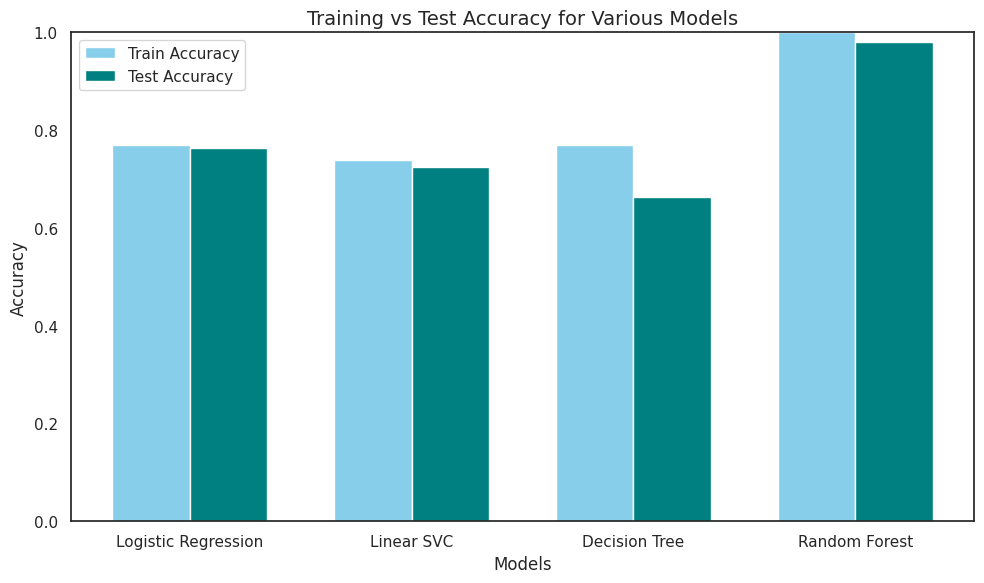

In [428]:
# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Calculate accuracies for each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)

    # Training accuracy
    y_train_pred = model.predict(X_train_smote)
    train_accuracies[name] = accuracy_score(y_train_smote, y_train_pred)

    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_accuracies[name] = accuracy_score(y_test, y_test_pred)

# Plot accuracies
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35
index = range(len(models))

# Create bars for train and test accuracies
bar1 = ax.bar(index, train_accuracies.values(), bar_width, label='Train Accuracy', color='skyblue')
bar2 = ax.bar([i + bar_width for i in index], test_accuracies.values(), bar_width, label='Test Accuracy', color='teal')

# Add labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Training vs Test Accuracy for Various Models', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models.keys())
ax.set_ylim(0, 1)  # Accuracy is between 0 and 1
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

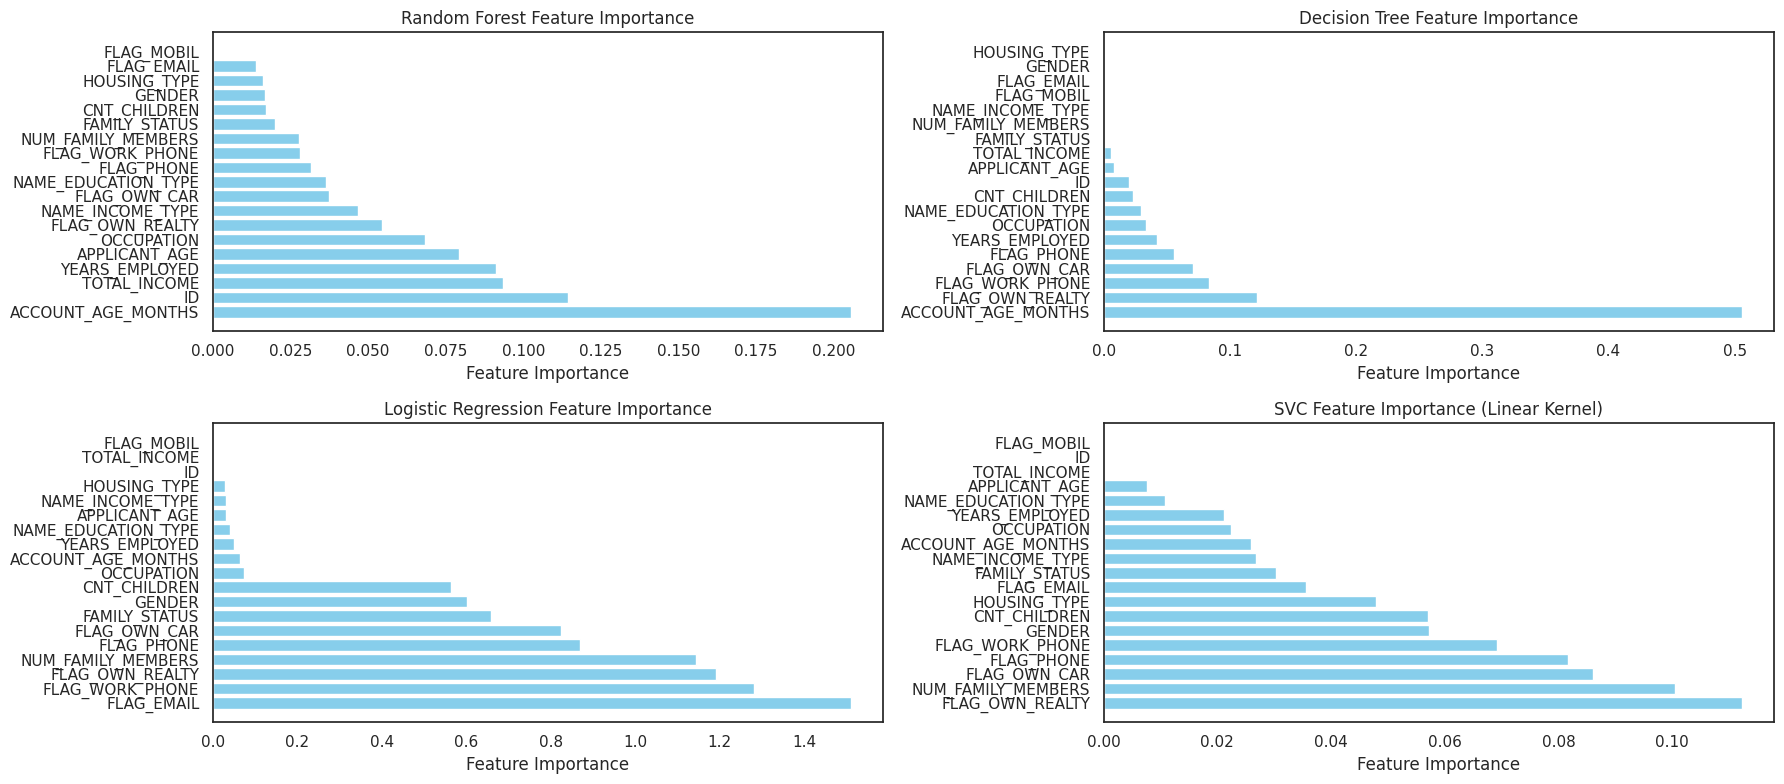

In [430]:
# Get feature importance for Random Forest and Decision Tree
rf_feature_importance = rf.feature_importances_
dt_feature_importance = dt.feature_importances_

# Get coefficients for Logistic Regression and SVC (linear kernel)
lr_feature_importance = np.abs(lr.coef_[0])
svc_feature_importance = np.abs(svc.coef_[0])

# Sort features by importance
rf_sorted_idx = np.argsort(rf_feature_importance)[::-1]
dt_sorted_idx = np.argsort(dt_feature_importance)[::-1]
lr_sorted_idx = np.argsort(lr_feature_importance)[::-1]
svc_sorted_idx = np.argsort(svc_feature_importance)[::-1]

# Plot Feature Importances
plt.figure(figsize=(18, 8))

# Random Forest Feature Importance
plt.subplot(2, 2, 1)
plt.barh(range(len(rf_sorted_idx)), rf_feature_importance[rf_sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(rf_sorted_idx)), np.array(X.columns)[rf_sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# Decision Tree Feature Importance
plt.subplot(2, 2, 2)
plt.barh(range(len(dt_sorted_idx)), dt_feature_importance[dt_sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(dt_sorted_idx)), np.array(X.columns)[dt_sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')

# Logistic Regression Feature Importance
plt.subplot(2, 2, 3)
plt.barh(range(len(lr_sorted_idx)), lr_feature_importance[lr_sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(lr_sorted_idx)), np.array(X.columns)[lr_sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')

# SVC Feature Importance (Linear Kernel)
plt.subplot(2, 2, 4)
plt.barh(range(len(svc_sorted_idx)), svc_feature_importance[svc_sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(svc_sorted_idx)), np.array(X.columns)[svc_sorted_idx])
plt.xlabel('Feature Importance')
plt.title('SVC Feature Importance (Linear Kernel)')

plt.tight_layout()
plt.show()